In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
print(tf.__version__) 

Using TensorFlow backend.


1.15.0


In [2]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## 1.このSprintについて
### Sprintの目的
フレームワークのコードを読めるようにする  
フレームワークを習得し続けられるようになる  
理論を知っている範囲をフレームワークで動かす  
### どのように学ぶか
前半はTensorFlowのExampleを動かします。後半ではKerasのコードを書いていきます。  
## 2.公式Example
深層学習フレームワークには公式に様々なモデルのExampleコードが公開されています。

# 【問題1】公式チュートリアルモデルを分担して実行

TensorFLowの公式チュートリアルモデルを分担して実行してください。  
以下の中から1人ひとつ選び実行し、その結果を簡単に発表してください。

### → 「画像：画像のセグメンテーション」を講義内で発表

# 【問題2】（アドバンス課題）様々な手法を実行

TensorFLowやGoogle AI ResearchのGitHubリポジトリには、定番のモデルから最新のモデルまで多様なコードが公開されています。これらから興味あるものを選び実行してください。  
なお、これらのコードは初学者向けではないため、巨大なデータセットのダウンロードが必要な場合など、実行が簡単ではないこともあります。そういった場合は、コードリーディングを行ってください。  
models/research at master · tensorflow/models  
google-research/google-research: Google AI Research  
更新日が古いものはPythonやTensorFlowのバージョンが古く、扱いずらい場合があります。新しいものから見ることを推奨します。  

## 3.異なるフレームワークへの書き換え
「ディープラーニングフレームワーク1」で作成した4種類のデータセットを扱うTensorFLowのコードを異なるフレームワークに変更していきます。  
Iris（Iris-versicolorとIris-virginicaのみの2値分類）  
Iris（3種類全ての目的変数を使用して多値分類）  
House Prices  
MNIST  
### Kerasへの書き換え
KerasはTensorFLowに含まれるtf.kerasモジュールを使用してください。  
KerasにはSequentialモデルかFunctional APIかなど書き方に種類がありますが、これは指定しません。  

# 【問題3】Iris（2値分類）をKerasで学習

TensorFlowによるIrisデータセットに対する2値分類をKerasに書き換えてください。

In [3]:
# データセットの読み込み
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)

# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [4]:
# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 10
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

In [5]:
# セッションをクリアする
K.clear_session()

# モデルの初期化
model = tf.keras.Sequential()

# レイヤーの追加
model.add(tf.keras.layers.Dense(n_hidden1, activation = tf.nn.relu, input_shape=(n_input,)))
model.add(tf.keras.layers.Dense(n_hidden2, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(n_classes, activation = tf.nn.sigmoid))

# モデルのコンパイル
model.compile(loss='binary_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])

# 学習
history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=20,
                    verbose=1)

# 推定
y_pred_proba = model.predict(X_train)[:, 0]

# 確率を0, 1に変換
y_pred = np.where(y_pred_proba >0.5, 1, 0)
print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 64 samples
Epoch 1/20
64/64 [==============================] - 0s 7ms/sample - loss: 0.8749 - acc: 0.5469
Epoch 2/20
64/64 [==============================] - 0s 1ms/sample - loss: 0.7045 - acc: 0.5312
Epoch 3/20
64/64 [==============================] - 0s 1ms/sample - loss: 0.6725 - acc: 0.5000
Epoch 4/20
64/64 [==============================] - 0s 1ms/sample - loss: 0.7008 - acc: 0.4688
Epoch 5/20
64/64 [==============================] - 0s 1ms/sample - loss: 0.6949 - acc: 0.4844
Epoch 6/20
64/64 [==============================] - 0s 1ms/sample - loss: 0.6969 - acc: 0.5312
Epoch 7/20
64/64 [==============================] - 0s 1ms/sample - loss: 0.6927 - acc: 0.5312
Epoch 8/20
64/64 [==============================] - 0s 1ms/sample - loss: 0.6939 - acc: 0.5312
Epoch 9/20
64/64 [===========================

# 【問題4】Iris（多値分類）をKerasで学習

TensorFlowによるIrisデータセットに対する3値分類をKerasに書き換えてください。

In [6]:
# データセットの読み込み
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)

# データフレームから条件抽出
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# ラベルを数値に変換
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_val_one_hot = enc.fit_transform(y_val[:, np.newaxis])
y_test_one_hot = enc.fit_transform(y_test[:, np.newaxis])

In [7]:
# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 10
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 3

利用可能な損失関数  
https://keras.io/ja/losses/

In [8]:
# セッションをクリアする
K.clear_session()

# モデルの初期化
model = tf.keras.Sequential()

# レイヤーの追加
model.add(tf.keras.layers.Dense(n_hidden1, activation = tf.nn.relu, input_shape=(n_input,)))
model.add(tf.keras.layers.Dense(n_hidden2, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(n_classes, activation = tf.nn.softmax))

# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])

# 学習
history = model.fit(X_train, y_train_one_hot,
                    batch_size=1,
                    epochs=20,
                    verbose=1)

# 推定
y_pred_proba = model.predict(X_train)

# 確率を0, 1に変換
y_pred = np.where(y_pred_proba >0.5, 1, 0)
print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

Train on 96 samples
Epoch 1/20
96/96 [==============================] - 1s 6ms/sample - loss: 0.3700 - acc: 0.8229
Epoch 2/20
96/96 [==============================] - 0s 2ms/sample - loss: 0.3133 - acc: 0.8681
Epoch 3/20
96/96 [==============================] - 0s 2ms/sample - loss: 0.1398 - acc: 0.9514
Epoch 4/20
96/96 [==============================] - 0s 2ms/sample - loss: 0.1183 - acc: 0.9583
Epoch 5/20
96/96 [==============================] - 0s 2ms/sample - loss: 0.1536 - acc: 0.9375
Epoch 6/20
96/96 [==============================] - 0s 2ms/sample - loss: 0.2445 - acc: 0.8681
Epoch 7/20
96/96 [==============================] - 0s 2ms/sample - loss: 0.1389 - acc: 0.9583
Epoch 8/20
96/96 [==============================] - 0s 2ms/sample - loss: 0.0589 - acc: 0.9861
Epoch 9/20
96/96 [==============================] - 0s 2ms/sample - loss: 0.1672 - acc: 0.9583
Epoch 10/20
96/96 [==============================] - 0s 2ms/sample - loss: 0.1641 - acc: 0.9583
Epoch 11/20
96/96 [==========

# 【問題5】House PricesをKerasで学習

TensorFlowによるHouse Pricesデータセットに対する回帰をKerasに書き換えてください。

In [45]:
# データセットの読み込み
df = pd.read_csv('train.csv')

# データフレームから条件抽出
X = np.array(df[['GrLivArea','YearBuilt']])
y = np.array(df['SalePrice'])

## 正則化
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

y = np.log(y)

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## データの変形
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [46]:
## ハイパーパラメータ
learning_rate = 0.005
batch_size = 200
num_epochs = 30
n_hidden1 = 100
n_hidden2 = 50
n_samples = X_train.shape[0]
n_input = X_train.shape[1]
n_classes = 1

#### 線形回帰のKerasによる表現
単純パーセプトロンから活性化関数とバイアス項を取り除くと、単なる線形回帰問題になる。

In [47]:
# セッションをクリアする
K.clear_session()

# モデルの初期化
model = tf.keras.Sequential()

# レイヤーの追加
model.add(tf.keras.layers.Dense(n_hidden1, activation = tf.nn.relu, input_shape=(n_input,)))
model.add(tf.keras.layers.Dense(n_hidden2, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1, use_bias=False))

# モデルのコンパイル
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.01), loss='mse')

# 学習
history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=20,
                    verbose=1)

# 推定
y_pred = model.predict(X_train)

mses = history.history['loss']
param = model.get_weights()[0]
print("mse: \n", mses[-1])
print("paramater: \n", param)
#print("y_pred: \n", y_pred)

Train on 934 samples
Epoch 1/20
934/934 [==============================] - 1s 1ms/sample - loss: 2.7552
Epoch 2/20
934/934 [==============================] - 1s 1ms/sample - loss: 0.3763
Epoch 3/20
934/934 [==============================] - 1s 1ms/sample - loss: 0.3710
Epoch 4/20
934/934 [==============================] - 1s 1ms/sample - loss: 0.2078
Epoch 5/20
934/934 [==============================] - 1s 1ms/sample - loss: 0.3144
Epoch 6/20
934/934 [==============================] - 1s 1ms/sample - loss: 0.3828
Epoch 7/20
934/934 [==============================] - 1s 1ms/sample - loss: 0.2342
Epoch 8/20
934/934 [==============================] - 1s 1ms/sample - loss: 0.1879
Epoch 9/20
934/934 [==============================] - 1s 1ms/sample - loss: 0.1661
Epoch 10/20
934/934 [==============================] - 1s 1ms/sample - loss: 0.2781
Epoch 11/20
934/934 [==============================] - 1s 1ms/sample - loss: 0.1475
Epoch 12/20
934/934 [==============================] - 1s 1ms/sa

# 【問題6】MNISTをKerasで学習

TensorFlowによるMNISTデータセットによる画像の多値分類をKerasに書き換えてください。

In [12]:
# データセットの読み込み
import keras
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 平滑化
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# 0から1のfloat型に変換
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

# 訓練データと検証データに分割
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# one-hot表現 に変換
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_val_one_hot = enc.fit_transform(y_val[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

In [13]:
# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 200
num_epochs = 5
n_hidden1 = 400
n_hidden2 = 200
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 10

In [14]:
# セッションをクリアする
K.clear_session()

# モデルの初期化
model = tf.keras.Sequential()

# レイヤーの追加
model.add(tf.keras.layers.Dense(n_hidden1, activation = tf.nn.relu, input_shape=(n_input,)))
model.add(tf.keras.layers.Dense(n_hidden2, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(n_classes, activation = tf.nn.softmax))

# モデルのコンパイル
model.compile(loss='binary_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])

# 学習
history = model.fit(X_train, y_train_one_hot,
                    batch_size=20,
                    epochs=10,
                    verbose=1)

# 推定
y_pred_proba = model.predict(X_train)

# 確率を0, 1に変換
y_pred = np.where(y_pred_proba >0.5, 1, 0)
print("y_pred_proba", y_pred_proba[:10])
print("y_pred", y_pred[:10])

Train on 48000 samples
Epoch 1/10
48000/48000 [==============================] - 12s 256us/sample - loss: 0.0586 - acc: 0.9818
Epoch 2/10
48000/48000 [==============================] - 12s 252us/sample - loss: 0.0387 - acc: 0.9886
Epoch 3/10
48000/48000 [==============================] - 12s 255us/sample - loss: 0.0343 - acc: 0.9906
Epoch 4/10
48000/48000 [==============================] - 14s 284us/sample - loss: 0.0331 - acc: 0.9912
Epoch 5/10
48000/48000 [==============================] - 16s 324us/sample - loss: 0.0302 - acc: 0.9924
Epoch 6/10
48000/48000 [==============================] - 16s 325us/sample - loss: 0.0286 - acc: 0.9929
Epoch 7/10
48000/48000 [==============================] - 15s 310us/sample - loss: 0.0281 - acc: 0.9930
Epoch 8/10
48000/48000 [==============================] - 15s 302us/sample - loss: 0.0259 - acc: 0.9936
Epoch 9/10
48000/48000 [==============================] - 15s 310us/sample - loss: 0.0267 - acc: 0.9937
Epoch 10/10
48000/48000 [================

# 【問題7】（アドバンス課題）PyTorchへの書き換え

4種類の問題をPyTorchに書き換えてください。

## ① Iris（2値分類）をPyTorchで学習

In [15]:
# データセットの読み込み
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)

# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [16]:
x = Variable(torch.from_numpy(X_train).float(), requires_grad=True)
y = Variable(torch.from_numpy(y_train).float())

In [17]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [18]:
net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [19]:
for i in range(3000):
    optimizer.zero_grad()
    output = net(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

In [20]:
outputs = net(Variable(torch.from_numpy(X_test).float()))
_, predicted = torch.max(outputs.data, 1)
y_predicted = predicted.numpy()
y_true = np.argmax(y_test, axis=1)
accuracy = (int)(100 * np.sum(y_predicted == y_true) / len(y_predicted))
print('accuracy: {0}%'.format(accuracy))

accuracy: 100%


## ② Iris（多値分類）をPyTorchで学習

In [21]:
# データセットの読み込み
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)

# データフレームから条件抽出
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# ラベルを数値に変換
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_val_one_hot = enc.fit_transform(y_val[:, np.newaxis])
y_test_one_hot = enc.fit_transform(y_test[:, np.newaxis])

In [22]:
x = Variable(torch.from_numpy(X_train).float(), requires_grad=True)
y = Variable(torch.from_numpy(y_train_one_hot).float())

In [23]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 8)
        self.fc3 = nn.Linear(8, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [24]:
net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [25]:
for i in range(3000):
    optimizer.zero_grad()
    output = net(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

In [26]:
outputs = net(Variable(torch.from_numpy(X_test).float()))
_, predicted = torch.max(outputs.data, 1)
y_predicted = predicted.numpy()
y_true = np.argmax(y_test_one_hot, axis=1)
accuracy = (int)(100 * np.sum(y_predicted == y_true) / len(y_predicted))
print('accuracy: {0}%'.format(accuracy))

accuracy: 100%


## ③ House PricesをPyTorchで学習

In [27]:
# データセットの読み込み
df = pd.read_csv('train.csv')

# データフレームから条件抽出
X = np.array(df[['GrLivArea','YearBuilt']])
y = np.array(df['SalePrice'])

## 正則化
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## データの変形
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [28]:
x = Variable(torch.from_numpy(X_train).float(), requires_grad=True)
y = Variable(torch.from_numpy(y_train).float())

In [29]:
from torch import nn, optim

# モデルの生成
net = nn.Linear(in_features=2, out_features=1, bias=False)

# オプティマイザの生成
optimizer = optim.SGD(net.parameters(), lr=0.1)

# 損失関数の生成
loss_fn = nn.MSELoss()

# 学習前のパラメータ
print(list(net.parameters()))

[Parameter containing:
tensor([[ 0.5824, -0.5758]], requires_grad=True)]


In [30]:
losses = []

for epoc in range(300):
   # 前回のbackwardで計算した勾配の削除
   optimizer.zero_grad()

   # 予測値の計算
   y_pred = net(x)

   # 損失関数の計算
   loss = loss_fn(y_pred.view_as(y), y)

   # 微分の計算
   loss.backward()

   # パラメータの更新
   optimizer.step()

   # 収束確認のため損失を保持
   losses.append(loss.item())


# 学習後のパラメータ
print(list(net.parameters()))

[Parameter containing:
tensor([[52250.2539, 25747.5195]], requires_grad=True)]


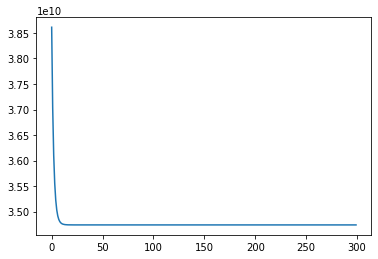

In [31]:
# グラフのプロット
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

## ④ MNISTをPyTorchで学習

In [48]:
from torch import nn

class cnn(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(16*5*5, 120),
            nn.ReLU(inplace=True),
            nn.Linear(120,84),
            nn.ReLU(inplace=True),
            nn.Linear(84, 10),
            nn.Softmax(dim=1),
        )

        # weight init                                                                      
        for m in self.layers.children():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight)

    def forward(self, x):
        return self.layers(x)

In [49]:
from torch import nn

class cnn2(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 6, kernel_size=5, padding=2)
        self.r1 = nn.ReLU(inplace=True)
        self.m1 = nn.MaxPool2d(2)
        self.c2 = nn.Conv2d(6, 16, kernel_size=5)
        self.r2 = nn.ReLU(inplace=True)
        self.m2 = nn.MaxPool2d(2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16*5*5, 120)
        self.r3 = nn.ReLU(inplace=True)
        self.fc2 = nn.Linear(120,84)
        self.r4 = nn.ReLU(inplace=True)
        self.fc3 = nn.Linear(84, 10)
        self.softmax = nn.Softmax(dim=1)

        # weight init                                                                      
        for m in self.children():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight)

    def forward(self, x):
        x = self.m1(self.r1(self.c1(x)))
        x = self.m2(self.r2(self.c2(x)))
        x = self.flatten(x)
        x = self.r3(self.fc1(x))
        x = self.r4(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

In [50]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST

model = cnn()
opt = torch.optim.Adam(model.parameters())

# datasetの読み出し                                                                    
bs = 128 # batch size                                                                  
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=bs, shuffle=True)

testset = MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=bs, shuffle=False)

# training                                                                             
print('train')
model = model.train()
for iepoch in range(3):
    for iiter, (x, y) in enumerate(trainloader, 0):

        y = torch.eye(10)[y]

        # 推定                                                                         
        y_ = model.forward(x) # y_.shape = (bs, 84)                                    

        # loss: cross-entropy                                                          
        eps = 1e-7
        loss = -torch.mean(y*torch.log(y_+eps))

        opt.zero_grad() # 勾配初期化
        loss.backward() # backward (勾配計算)
        opt.step() # パラメータの微小移動

        # 100回に1回進捗を表示（なくてもよい）
        if iiter%100==0:
            print('%03d epoch, %05d, loss=%.5f' %
                  (iepoch, iiter, loss.item()))

# test                                                                                 
print('test')
total, tp = 0, 0
model = model.eval()
for (x, label) in testloader:

    # 推定                                                                             
    y_ = model.forward(x)
    label_ = y_.argmax(1)

    # 結果集計                                                                         
    total += label.shape[0]
    tp += (label_==label).sum().item()

acc = tp/total
print('test accuracy = %.3f' % acc)

train
000 epoch, 00000, loss=0.37773
000 epoch, 00100, loss=0.03834
000 epoch, 00200, loss=0.02068
000 epoch, 00300, loss=0.00783
000 epoch, 00400, loss=0.00720
001 epoch, 00000, loss=0.00899
001 epoch, 00100, loss=0.00663
001 epoch, 00200, loss=0.00293
001 epoch, 00300, loss=0.00476
001 epoch, 00400, loss=0.01308
002 epoch, 00000, loss=0.00414
002 epoch, 00100, loss=0.00695
002 epoch, 00200, loss=0.00769
002 epoch, 00300, loss=0.01498
002 epoch, 00400, loss=0.00520
test
test accuracy = 0.986


# 【問題8】（アドバンス課題）フレームワークの比較

それぞれのフレームワークにはどのような違いがあるかをまとめてください。  
《視点例》  
計算速度  
コードの行数・可読性  
用意されている機能  

## ① 計算速度

計算速度は以下の通り
① PyTorch
② tensorflow
③ keras
「PyTorch」が「tensorflow（keras）」よりも処理速度が速い

## ② コードの行数・可読性 

「PyTorch」と「tensorflow」は複雑なコードが書ける反面、コードの記載方法が冗長となり可読性は下がる。
一方、「keras」はシンプルにコードを書くことができるため可読性が良いが、「tensorflow」のような複雑な処理をコード化するのは難しい。

## ③ 用意されている機能

Tensorflowを利用できるプログラミング言語は、PythonやC++、Java、Go


KerasはPythonのみ



PyTorchを利用できるプログラミング言語は、Pythonのみ
Define by runを採用
TensorはNumPyのndarrayと同様に使用できる多次元配列であり、GPUでの計算もサポートしていて大規模な行列の計算などに威力を発揮します。

　Tensorは自動で微分を計算することができ、ニューラルネットワークの最適化で重要になります。

